In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Read in dataframe
#https://datatofish.com/read_excel/
df = pd.read_excel('../../Datasets/Original_Data/data_cts_prisons_and_prisoners.xlsx')

In [5]:
df.head()

,UNODC,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,11/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
2,BRB,Barbados,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,0,CTS
3,CRI,Costa Rica,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,173,CTS
4,DMA,Dominica,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,65,CTS


In [6]:
#Drop first row
df = df.drop(df.index[0])
df.head()

,UNODC,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
2,BRB,Barbados,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,0,CTS
3,CRI,Costa Rica,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,173,CTS
4,DMA,Dominica,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,65,CTS
5,GBR_NI,United Kingdom (Northern Ireland),Europe,Northern Europe,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,61,CTS


In [7]:
#First row currently has column headers. Going to change it so headers are named accordingly
#https://saturncloud.io/blog/what-is-python-pandas-replacing-header-with-top-row-and-how-to-do-it/#:~:text=If%20you%20already%20have%20a,using%20the%20rename()%20method.&text=In%20the%20above%20code%2C%20we,and%20set%20it%20to%20df.
df = df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
2,BRB,Barbados,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,0,CTS
3,CRI,Costa Rica,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,173,CTS
4,DMA,Dominica,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,65,CTS
5,GBR_NI,United Kingdom (Northern Ireland),Europe,Northern Europe,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,61,CTS
6,ITA,Italy,Europe,Southern Europe,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2016,Counts,1443,CTS


In [8]:
df_copy = df

In [9]:
#Only keeping data relevant to Honduras and El Salvador
df = df[df['Country'].isin(['Honduras', 'El Salvador'])]
df.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
98,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Intentional Homicide,Total,Total,2019,Counts,14643,CTS
256,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Rape,Total,Total,2019,Counts,2822,CTS
326,HND,Honduras,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Drug Possession,Total,Total,2016,Counts,87,CTS
343,HND,Honduras,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Drug Possession,Total,Total,2017,Counts,94,CTS
403,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons entering prison,by selected crime,Drug Possession,Total,Total,2019,Counts,3757,CTS


In [10]:
df.shape

(1018, 13)

In [11]:
#Checking nulls
df.isnull().sum()

Iso3_code              0
Country                0
Region                 0
Subregion              0
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit of measurement    0
VALUE                  0
Source                 0
dtype: int64

In [12]:
df['Indicator'].value_counts()

Persons held                                     695
Persons entering prison                          102
Persons held unsentenced                          86
Mortality in prison                               65
Prisons facilities and capacity                   52
Persons held under other types of supervision     18
Name: Indicator, dtype: int64

In [13]:
df['Category'].value_counts()

Total                                                            361
Unsentenced                                                      116
Sentenced                                                         68
Unsentenced: Total                                                60
Official prison capacity                                          44
Intentional Homicide                                              24
Acts involving controlled psycho-active substances                22
Foreign citizens                                                  21
National citizens                                                 19
Drug possession                                                   18
Acts leading to death or intending to cause death                 16
Acts against property involving violence                          16
Drug trafficking                                                  16
Acts against public safety and state security                     16
Rape                              

In [14]:
#Xiomara Castro came in 2022
#Nayib Bukele came in 2019

In [15]:
(df['Country'] == 'El Salvador').sum()

564

In [16]:
(df['Country'] == 'Honduras').sum()

454

In [17]:
df['Age'].value_counts()

Total        858
Adult        102
Juveniles     58
Name: Age, dtype: int64

In [18]:
df['Sex'].value_counts()

Total     759
Male      131
Female    128
Name: Sex, dtype: int64

In [19]:
#Dataframe for only men
df_men = df[df['Sex'].isin(['Male'])]

In [20]:
df_men.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
10110,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2005,Counts,11940,CTS
10172,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2006,Counts,13944,CTS
10238,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2007,Counts,16762,CTS
10314,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2008,Counts,18269,CTS
10403,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2009,Counts,20164,CTS


In [21]:
df_men.shape 

(131, 13)

In [22]:
df_men.Age.value_counts()

Total        86
Adult        27
Juveniles    18
Name: Age, dtype: int64

In [23]:
df_men.Indicator.value_counts()

Persons held                                     123
Persons held under other types of supervision      6
Prisons facilities and capacity                    2
Name: Indicator, dtype: int64

In [24]:
#Dataframe for women only
df_women = df[df['Sex'].isin(['Female'])]

In [25]:
df_women.shape

(128, 13)

In [26]:
df_men.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
10110,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2005,Counts,11940,CTS
10172,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2006,Counts,13944,CTS
10238,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2007,Counts,16762,CTS
10314,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2008,Counts,18269,CTS
10403,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Male,Adult,2009,Counts,20164,CTS


In [27]:
df_women.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
11709,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Female,Adult,2005,Counts,585,CTS
11800,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Female,Adult,2006,Counts,827,CTS
11889,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Female,Adult,2007,Counts,1105,CTS
11986,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Female,Adult,2008,Counts,1545,CTS
12083,SLV,El Salvador,Americas,Latin America and the Caribbean,Persons held,Total,Total,Female,Adult,2009,Counts,1937,CTS


In [28]:
df_women['Indicator'].value_counts()

Persons held                                     120
Persons held under other types of supervision      6
Prisons facilities and capacity                    2
Name: Indicator, dtype: int64

In [29]:
df_women.Category.value_counts()

Total                       106
Unsentenced                  20
Official prison capacity      2
Name: Category, dtype: int64

In [30]:
#Only keeping Total from Category
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
df_men = df_men[df_men['Category'].str.contains('Total')]

In [31]:
df_women = df_women[df_women['Category'].str.contains('Total')]

In [32]:
df_women.Year.value_counts()

2019    9
2018    8
2011    8
2017    8
2013    7
2010    7
2012    7
2014    7
2015    7
2016    6
2020    6
2021    6
2006    4
2009    4
2008    4
2007    4
2005    4
Name: Year, dtype: int64

([<matplotlib.axis.XTick at 0x156cd5b90>,
 [Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

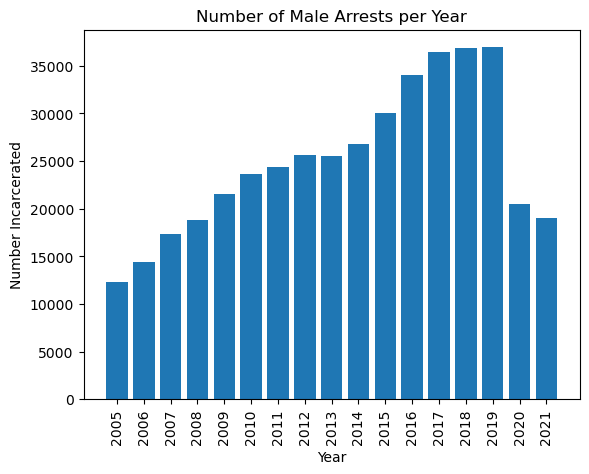

In [33]:
plt.bar(df_men.Year, df_men.VALUE)
plt.xlabel('Year')
plt.ylabel('Number Incarcerated')
plt.title('Number of Male Arrests per Year')
plt.xticks(np.arange(2005, 2022), rotation = 90)
#Figure out how to add numbers to top of bar chart

([<matplotlib.axis.XTick at 0x155e60310>,
 [Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

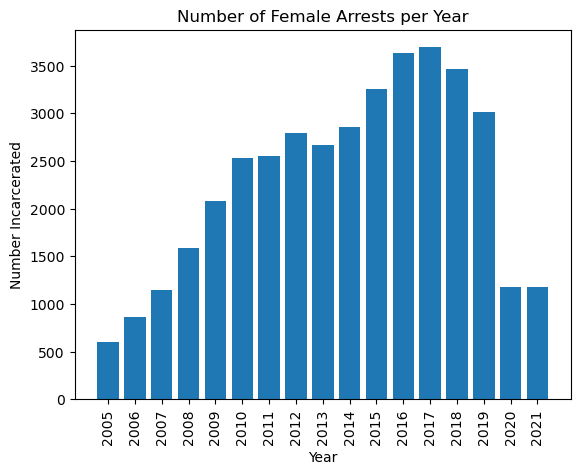

In [34]:
plt.bar(df_women.Year, df_women.VALUE)
plt.xlabel('Year')
plt.ylabel('Number Incarcerated')
plt.title('Number of Female Arrests per Year')
plt.xticks(np.arange(2005, 2022), rotation = 90)
#Figure out how to add numbers to top of bar chart

In [35]:
#El Salvador Men df
el_salvador_men_df = df_men[df_men['Country'] == 'El Salvador']

In [36]:
#El Salvador Women df
el_salvador_women_df = df_women[df_women['Country'] == 'El Salvador']

In [37]:
#Honduras Men df
honduras_men_df = df_men[df_men['Country'] == 'Honduras']

In [38]:
#Honduras Women df
honduras_women_df = df_women[df_women['Country'] == 'Honduras']

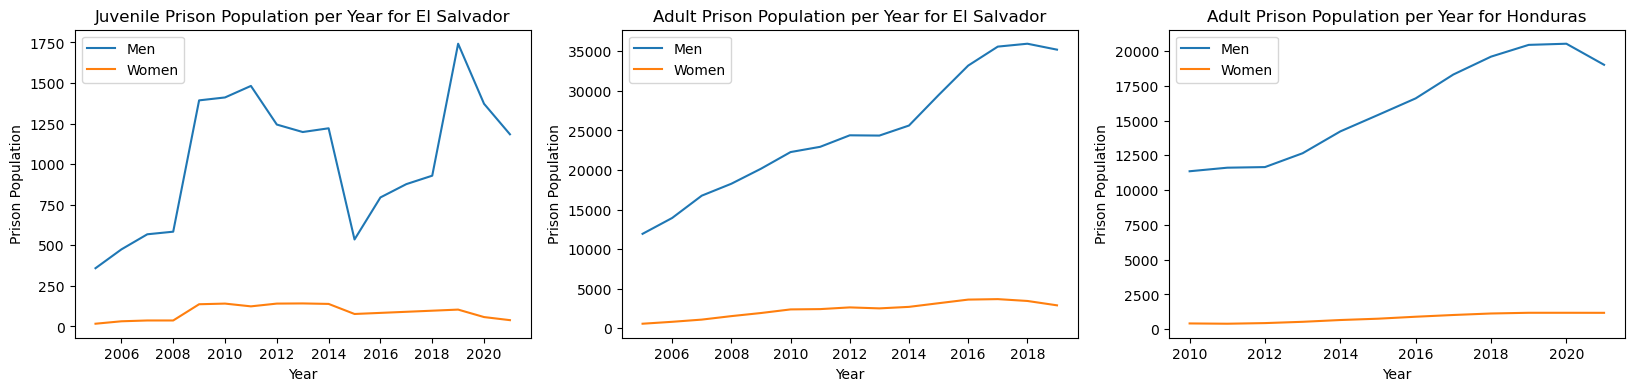

In [39]:
#El Salvador incarceration per year line charts
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

#Filter df so it only shows Juvenile Men, Juvenile Women, Adult Men, Adult Women for El Salvador
#Extract values from this column
el_salvador_men_juv = el_salvador_men_df[el_salvador_men_df['Age'] == 'Juveniles']['VALUE'].tolist()
el_salvador_men_juv_years = el_salvador_men_df[el_salvador_men_df['Age'] == 'Juveniles']['Year'].tolist()

el_salvador_women_juv = el_salvador_women_df[el_salvador_women_df['Age'] == 'Juveniles']['VALUE'].tolist()
el_salvador_women_juv_years = el_salvador_women_df[el_salvador_women_df['Age'] == 'Juveniles']['Year'].tolist()

el_salvador_men_adult = el_salvador_men_df[el_salvador_men_df['Age'] == 'Adult']['VALUE'].tolist()
el_salvador_men_adult_years = el_salvador_men_df[el_salvador_men_df['Age'] == 'Adult']['Year'].tolist()

el_salvador_women_adult = el_salvador_women_df[el_salvador_women_df['Age'] == 'Adult']['VALUE'].tolist()
el_salvador_women_adult_years = el_salvador_women_df[el_salvador_women_df['Age'] == 'Adult']['Year'].tolist()

#Filter for Honduras, similar to above
honduras_men_juv = honduras_men_df[honduras_men_df['Age'] == 'Juveniles']['VALUE'].tolist()
honduras_men_juv_years = honduras_men_df[honduras_men_df['Age'] == 'Juveniles']['Year'].tolist()

honduras_women_juv = honduras_women_df[honduras_women_df['Age'] == 'Juveniles']['VALUE'].tolist()
honduras_women_juv_years = honduras_women_df[honduras_women_df['Age'] == 'Juveniles']['Year'].tolist()

honduras_men_adult = honduras_men_df[honduras_men_df['Age'] == 'Adult']['VALUE'].tolist()
honduras_men_adult_years = honduras_men_df[honduras_men_df['Age'] == 'Adult']['Year'].tolist()

honduras_women_adult = honduras_women_df[honduras_women_df['Age'] == 'Adult']['VALUE'].tolist()
honduras_women_adult_years = honduras_women_df[honduras_women_df['Age'] == 'Adult']['Year'].tolist()

#Setting up plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,4))

#Plots for El Salvador
ax1.plot(el_salvador_men_juv_years, el_salvador_men_juv, label = 'Men')
ax1.plot(el_salvador_women_juv_years, el_salvador_women_juv, label = 'Women')
ax2.plot(el_salvador_men_adult_years, el_salvador_men_adult, label = 'Men')
ax2.plot(el_salvador_women_adult_years, el_salvador_women_adult, label = 'Women')


ax1.set_xlabel('Year')
ax1.set_ylabel('Prison Population')
ax1.set_title('Juvenile Prison Population per Year for El Salvador')
ax2.set_xlabel('Year')
ax2.set_ylabel('Prison Population')
ax2.set_title('Adult Prison Population per Year for El Salvador')
ax1.legend()
ax2.legend()

#Not enough Juvenile data to make plots for Honduras, will plot Adults
ax3.plot(honduras_men_adult_years, honduras_men_adult, label = 'Men')
ax3.plot(honduras_women_adult_years, honduras_women_adult, label = 'Women')
ax3.set_xlabel('Year')
ax3.set_ylabel('Prison Population')
ax3.set_title('Adult Prison Population per Year for Honduras')
ax3.legend()



In [40]:
len(el_salvador_men_adult), len(el_salvador_men_juv), len(el_salvador_women_adult), len(el_salvador_women_juv)

(15, 17, 15, 14)

In [41]:
#Honduras incarceration per year line charts

#Filter df so it only shows Juvenile Men, Juvenile Women, Adult Men, Adult Women
#Extract values from this column
honduras_men_juv = honduras_men_df[honduras_men_df['Age'] == 'Juveniles']['VALUE'].tolist()
honduras_men_juv_years = honduras_men_df[honduras_men_df['Age'] == 'Juveniles']['Year'].tolist()

honduras_women_juv = honduras_women_df[honduras_women_df['Age'] == 'Juveniles']['VALUE'].tolist()
honduras_women_juv_years = honduras_women_df[honduras_women_df['Age'] == 'Juveniles']['Year'].tolist()

honduras_men_adult = honduras_men_df[honduras_men_df['Age'] == 'Adult']['VALUE'].tolist()
honduras_men_adult_years = honduras_men_df[honduras_men_df['Age'] == 'Adult']['Year'].tolist()

honduras_women_adult = honduras_women_df[honduras_women_df['Age'] == 'Adult']['VALUE'].tolist()
honduras_women_adult_years = honduras_women_df[honduras_women_df['Age'] == 'Adult']['Year'].tolist()
#Create years for x axis

'''
fig, (ax) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot(honduras_men_juv_years, honduras_men_juv, label = 'Men')
ax1.plot(honduras_women_juv_years, honduras_women_juv, label = 'Women')
ax2.plot(honduras_men_adult_years, honduras_men_adult, label = 'Men')
ax2.plot(honduras_women_adult_years, honduras_women_adult, label = 'Women')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prison Population')
ax1.set_title('Juvenile Prison Population per Year for Honduras')
ax2.set_xlabel('Year')
ax2.set_ylabel('Prison Population')
ax2.set_title('Adult Prison Population per Year for Honduras')
ax1.legend()
ax2.legend()
'''


"\nfig, (ax) = plt.subplots(1, 2, figsize = (12,4))\n\nax1.plot(honduras_men_juv_years, honduras_men_juv, label = 'Men')\nax1.plot(honduras_women_juv_years, honduras_women_juv, label = 'Women')\nax2.plot(honduras_men_adult_years, honduras_men_adult, label = 'Men')\nax2.plot(honduras_women_adult_years, honduras_women_adult, label = 'Women')\nax1.set_xlabel('Year')\nax1.set_ylabel('Prison Population')\nax1.set_title('Juvenile Prison Population per Year for Honduras')\nax2.set_xlabel('Year')\nax2.set_ylabel('Prison Population')\nax2.set_title('Adult Prison Population per Year for Honduras')\nax1.legend()\nax2.legend()\n"

In [42]:
#Read in crime rate per year in el salvador
gg = pd.read_excel('../../Datasets/Original_Data/elsalvador_crimerate_peryear.xlsx')

Text(0.5, 1.0, 'El Salvador Crime Rate per Year')

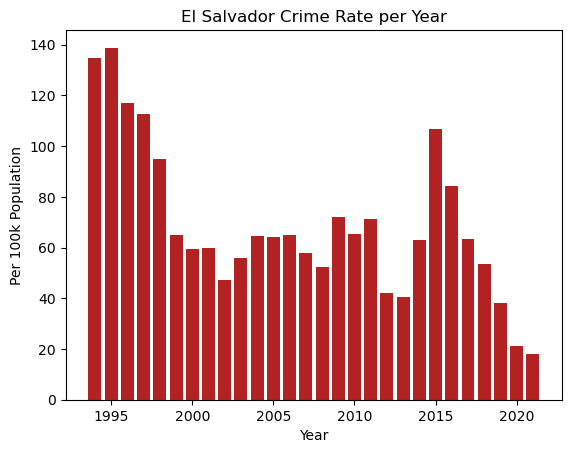

In [43]:
#Plot crime rate per year for El Salvador
#https://www.macrotrends.net/countries/SLV/el-salvador/crime-rate-statistics#:~:text=El%20Salvador%20crime%20rate%20%26%20statistics%20for%202021%20was%2018.17%2C%20a,a%2028.38%25%20decline%20from%202018.
plt.bar(gg['Year'], gg['Per 100K Population'], color = 'firebrick')
plt.xlabel('Year')
plt.ylabel('Per 100k Population')
plt.title('El Salvador Crime Rate per Year')
#Lowest crime rate since before civil war
#https://matplotlib.org/stable/gallery/color/named_colors.html
#Refrenced above for colors

In [44]:
#2011 honduras highest homicide rate in world

In [45]:
#El Salvador homicide rate
#https://elsalvadorinfo.net/homicide-rate-in-el-salvador/

In [46]:
#Honduras homicide rate 2014 to 2022
#https://www.statista.com/statistics/984779/homicide-rate-honduras/#:~:text=Honduras%3A%20homicide%20rate%202014%2D2022&text=In%202022%2C%20almost%2035.8%20homicides,66%20homicides%20per%20100%2C000%20residents.

In [47]:
#Honduras Murder/Homicide rate 1990-2023
#https://www.macrotrends.net/countries/HND/honduras/murder-homicide-rate

In [48]:
#Honduras prison pop total (Every 2 years)
#https://www.prisonstudies.org/country/honduras

In [49]:
#Honduras prison pop (2010 - 2021)
#https://countryeconomy.com/demography/prison-population/honduras
#El Salvador prison pop (2005-2019)
#https://countryeconomy.com/demography/prison-population/el-salvador

In [50]:
#https://www.cnn.com/2023/03/07/americas/el-salvador-prison-bukele-intl-latam/index.html
#https://www.prisonstudies.org/country/el-salvador

#Honduras copies el salvador
#Bukele’s harsh tactics have succeeded in weakening organized crime, but at a high cost to human rights.
#https://apnews.com/article/honduras-prisons-raids-rights-el-salvador-6e757b5fcc33ae9328640630e47a912d

#Honduras island prison, president Xiomara Castro
#https://www.nbcnews.com/news/latino/honduras-only-island-prison-colony-western-hemisphere-gangs-rcna95072